In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import files

# Upload 1 to 3 V2c files manually
uploaded = files.upload()

# Function to parse .V2c files
def parse_v2c_data(contents):
    acceleration = []
    for line in contents:
        try:
            values = [float(val) for val in line.strip().split()]
            acceleration.extend(values)
        except ValueError:
            continue
    return np.array(acceleration)

# Load and process uploaded files
acc_arrays = []
for filename in uploaded:
    with open(filename, "r") as f:
        lines = f.readlines()
        acc = parse_v2c_data(lines)
        acc_arrays.append(acc)

# Make sure all arrays are the same length
min_length = min(len(arr) for arr in acc_arrays)
acc_arrays = [arr[:min_length] for arr in acc_arrays]

# Dynamically calculate magnitude
acc_stack = np.vstack(acc_arrays)  # shape: (n_axes, n_points)
magnitude = np.sqrt(np.sum(acc_stack**2, axis=0))  # shape: (n_points,)

# Create a single row DataFrame with 'acc1', ..., 'accN', and 'earthquake?' = 1
def create_row_df(magnitude, count):
    segment = magnitude[:count]
    data = {f'acc{i+1}': val for i, val in enumerate(segment)}
    data['earthquake?'] = 1
    return pd.DataFrame([data])

# Append or create Excel files
def append_to_excel(filename, new_row_df):
    if os.path.exists(filename):
        existing_df = pd.read_excel(filename)
        combined_df = pd.concat([existing_df, new_row_df], ignore_index=True)
    else:
        combined_df = new_row_df
    combined_df.to_excel(filename, index=False)
    return combined_df

# Process all sizes
df_200 = create_row_df(magnitude, 200)
df_500 = create_row_df(magnitude, 500)
df_1000 = create_row_df(magnitude, 1000)

# Save to Excel
df_200_full = append_to_excel("earthquake_200.xlsx", df_200)
df_500_full = append_to_excel("earthquake_500.xlsx", df_500)
df_1000_full = append_to_excel("earthquake_1000.xlsx", df_1000)

# Show results
print("✅ Updated earthquake_200.xlsx:")
display(df_200_full.tail())

print("✅ Updated earthquake_500.xlsx:")
display(df_500_full.tail())

print("✅ Updated earthquake_1000.xlsx:")
display(df_1000_full.tail())


Saving TK2708-n.6000jllz.HNZ.--.acc.V2c to TK2708-n.6000jllz.HNZ.--.acc.V2c
Saving TK2708-n.6000jllz.HNN.--.acc.V2c to TK2708-n.6000jllz.HNN.--.acc.V2c
Saving TK2708-n.6000jllz.HNE.--.acc.V2c to TK2708-n.6000jllz.HNE.--.acc.V2c
✅ Updated earthquake_200.xlsx:


,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,...,acc192,acc193,acc194,acc195,acc196,acc197,acc198,acc199,acc200,earthquake?
153,3.678302e-07,4.035725e-07,4.416910e-07,4.800688e-07,5.188387e-07,5.592046e-07,6.006605e-07,6.413070e-07,6.816595e-07,7.253378e-07,...,0.000013,0.000009,0.000006,0.000003,0.000003,0.000003,0.000009,0.000017,0.000018,1
154,2.759184e-02,2.443303e-02,1.272556e-02,8.763457e-03,2.146715e-02,2.583069e-02,3.129269e-02,3.299656e-02,2.726448e-02,3.524671e-02,...,0.074955,0.050738,0.052061,0.049282,0.016514,0.012263,0.025285,0.023186,0.021138,0
155,4.876153e-02,5.686854e-02,4.464228e-02,3.399193e-02,3.295939e-02,3.579889e-02,5.117502e-02,4.700206e-02,4.813393e-02,5.943136e-02,...,0.024351,0.036684,0.035750,0.037569,0.019952,0.015460,0.032380,0.052953,0.074374,0
156,5.685940e-03,5.086036e-02,3.518575e-02,4.371483e-02,6.640318e-02,6.589844e-02,1.214293e-01,8.550058e-02,5.367472e-03,2.100656e-02,...,0.034367,0.002897,0.050673,0.011159,0.080519,0.072923,0.079110,0.119718,0.092221,0
157,1.936396e-02,2.739801e-02,2.508798e-02,2.660914e-02,2.585010e-02,2.664663e-02,2.630965e-02,2.682744e-02,2.668772e-02,2.705540e-02,...,0.047795,0.048240,0.048284,0.047953,0.048288,0.048831,0.047794,0.048601,0.048746,1


✅ Updated earthquake_500.xlsx:


,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,...,acc492,acc493,acc494,acc495,acc496,acc497,acc498,acc499,acc500,earthquake?
152,3.678302e-07,4.035725e-07,4.416910e-07,4.800688e-07,5.188387e-07,5.592046e-07,6.006605e-07,6.413070e-07,6.816595e-07,7.253378e-07,...,0.000042,0.000088,0.000138,0.000118,0.000043,0.000036,0.000032,0.000037,0.000042,1
153,2.759184e-02,2.443303e-02,1.272556e-02,8.763457e-03,2.146715e-02,2.583069e-02,3.129269e-02,3.299656e-02,2.726448e-02,3.524671e-02,...,0.005972,0.008847,0.022077,0.025969,0.014427,0.001218,0.017399,0.018547,0.042518,0
154,4.876153e-02,5.686854e-02,4.464228e-02,3.399193e-02,3.295939e-02,3.579889e-02,5.117502e-02,4.700206e-02,4.813393e-02,5.943136e-02,...,0.108144,0.118137,0.101353,0.094288,0.091683,0.097310,0.097999,0.085366,0.081435,0
155,5.685940e-03,5.086036e-02,3.518575e-02,4.371483e-02,6.640318e-02,6.589844e-02,1.214293e-01,8.550058e-02,5.367472e-03,2.100656e-02,...,0.201865,0.276552,0.217397,0.220568,0.170067,0.364211,0.292610,0.244065,0.232245,0
156,1.936396e-02,2.739801e-02,2.508798e-02,2.660914e-02,2.585010e-02,2.664663e-02,2.630965e-02,2.682744e-02,2.668772e-02,2.705540e-02,...,0.059700,0.058986,0.057781,0.057668,0.059526,0.058490,0.055364,0.058865,0.058894,1


✅ Updated earthquake_1000.xlsx:


,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,...,acc992,acc993,acc994,acc995,acc996,acc997,acc998,acc999,acc1000,earthquake?
151,3.678302e-07,4.035725e-07,4.416910e-07,4.800688e-07,5.188387e-07,5.592046e-07,6.006605e-07,6.413070e-07,6.816595e-07,7.253378e-07,...,0.000026,0.000059,0.000082,0.000193,0.000289,0.000263,0.000168,0.000231,0.000241,1
152,2.759184e-02,2.443303e-02,1.272556e-02,8.763457e-03,2.146715e-02,2.583069e-02,3.129269e-02,3.299656e-02,2.726448e-02,3.524671e-02,...,0.045614,0.049375,0.054925,0.057583,0.046980,0.041717,0.030744,0.037950,0.030358,0
153,4.876153e-02,5.686854e-02,4.464228e-02,3.399193e-02,3.295939e-02,3.579889e-02,5.117502e-02,4.700206e-02,4.813393e-02,5.943136e-02,...,0.022174,0.015645,0.014466,0.016381,0.012248,0.002364,0.016216,0.011539,0.001466,0
154,5.685940e-03,5.086036e-02,3.518575e-02,4.371483e-02,6.640318e-02,6.589844e-02,1.214293e-01,8.550058e-02,5.367472e-03,2.100656e-02,...,0.170982,0.138934,0.162598,0.124314,0.180016,0.074151,0.067620,0.012905,0.030419,0
155,1.936396e-02,2.739801e-02,2.508798e-02,2.660914e-02,2.585010e-02,2.664663e-02,2.630965e-02,2.682744e-02,2.668772e-02,2.705540e-02,...,0.035321,0.024711,0.029991,0.035013,0.024594,0.031730,0.026561,0.022906,0.036328,1


In [ ]:
import numpy as np
import pandas as pd
import os

# Sampling setup
fs = 1000  # Hz
duration = 1  # seconds (enough for 1000 samples)
samples = fs * duration
t = np.linspace(0, duration, samples)

# Signal generators
def generate_human_walk():
    freq = np.random.uniform(1.5, 3.0)
    amp = np.random.uniform(0.1, 0.4)
    noise = np.random.normal(0, 0.05, samples)
    return amp * np.sin(2 * np.pi * freq * t) + noise

def generate_truck_driveby():
    freq = np.random.uniform(2.5, 5.0)
    amp = np.random.uniform(0.5, 1.5)
    decay = np.exp(-np.linspace(0, 3, samples))
    noise = np.random.normal(0, 0.1, samples)
    return amp * np.sin(2 * np.pi * freq * t) * decay + noise

def generate_random_noise():
    spikes = np.random.normal(0, 1, samples)
    smooth = np.convolve(spikes, np.ones(20)/20, mode='same')
    return smooth * np.random.uniform(0.1, 0.3)

# Combined generator
def generate_non_eq_signal():
    kind = np.random.choice(['human', 'truck', 'noise'])
    if kind == 'human':
        return generate_human_walk()
    elif kind == 'truck':
        return generate_truck_driveby()
    else:
        return generate_random_noise()

# Append to Excel
def append_to_excel(filename, signals, sample_size):
    rows = []
    for signal in signals:
        trimmed = signal[:sample_size]
        row = {f'acc{i+1}': val for i, val in enumerate(trimmed)}
        row['earthquake?'] = 0
        rows.append(row)

    df_new = pd.DataFrame(rows)

    if os.path.exists(filename):
        df_existing = pd.read_excel(filename)
        df_combined = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_combined = df_new

    df_combined.to_excel(filename, index=False)
    print(f"✅ Added {len(signals)} non-earthquake signals to {filename}")

# Generate and distribute to all Excel files
non_eq_signals = [generate_non_eq_signal() for _ in range(3)]
append_to_excel('earthquake_200.xlsx', non_eq_signals, 200)
append_to_excel('earthquake_500.xlsx', non_eq_signals, 500)
append_to_excel('earthquake_1000.xlsx', non_eq_signals, 1000)


✅ Added 3 non-earthquake signals to earthquake_200.xlsx
✅ Added 3 non-earthquake signals to earthquake_500.xlsx
✅ Added 3 non-earthquake signals to earthquake_1000.xlsx


Results for 200 accelerations:
{'Accuracy': 0.5892857142857143, 'Precision': 1.0, 'Recall (True Positive Rate)': 0.23333333333333334, 'F1 Score': 0.3783783783783784, 'True Positive Rate': np.float64(0.23333333333333334), 'False Positive Rate': np.float64(0.0), 'True Negative Rate': np.float64(1.0), 'False Negative Rate': np.float64(0.7666666666666667), 'ROC AUC': np.float64(0.5429487179487179)}

Results for 500 accelerations:
{'Accuracy': 0.6363636363636364, 'Precision': 1.0, 'Recall (True Positive Rate)': 0.2857142857142857, 'F1 Score': 0.4444444444444444, 'True Positive Rate': np.float64(0.2857142857142857), 'False Positive Rate': np.float64(0.0), 'True Negative Rate': np.float64(1.0), 'False Negative Rate': np.float64(0.7142857142857143), 'ROC AUC': np.float64(0.6296296296296297)}

Results for 1000 accelerations:
{'Accuracy': 0.6545454545454545, 'Precision': 1.0, 'Recall (True Positive Rate)': 0.2962962962962963, 'F1 Score': 0.45714285714285713, 'True Positive Rate': np.float64(0.29

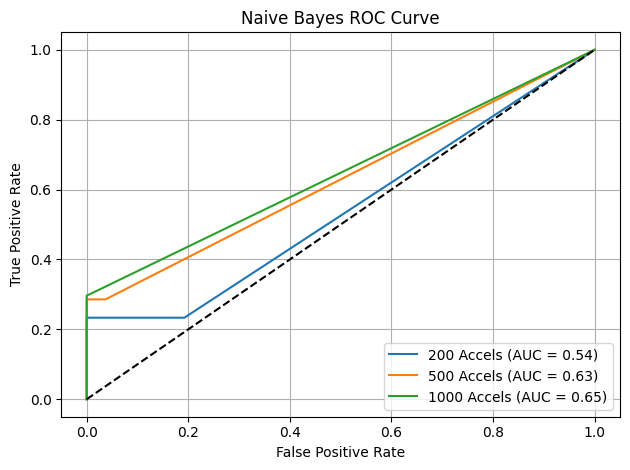

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_curve, auc, roc_auc_score
)

def evaluate_naive_bayes(file_path, label):
    # Load the dataset
    df = pd.read_excel(file_path)
    X = df.drop(columns=['earthquake?'])
    y = df['earthquake?']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Initialize and train the model
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    # Plot ROC
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (True Positive Rate)": recall,
        "F1 Score": f1,
        "True Positive Rate": tp / (tp + fn) if (tp + fn) > 0 else 0,
        "False Positive Rate": fp / (fp + tn) if (fp + tn) > 0 else 0,
        "True Negative Rate": tn / (tn + fp) if (tn + fp) > 0 else 0,
        "False Negative Rate": fn / (fn + tp) if (fn + tp) > 0 else 0,
        "ROC AUC": auc_score
    }

# Evaluate each file
results_200 = evaluate_naive_bayes("earthquake_200.xlsx", "200 Accels")
results_500 = evaluate_naive_bayes("earthquake_500.xlsx", "500 Accels")
results_1000 = evaluate_naive_bayes("earthquake_1000.xlsx", "1000 Accels")

# Display metrics
print("Results for 200 accelerations:")
print(results_200)
print("\nResults for 500 accelerations:")
print(results_500)
print("\nResults for 1000 accelerations:")
print(results_1000)

# Finalize and show ROC plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


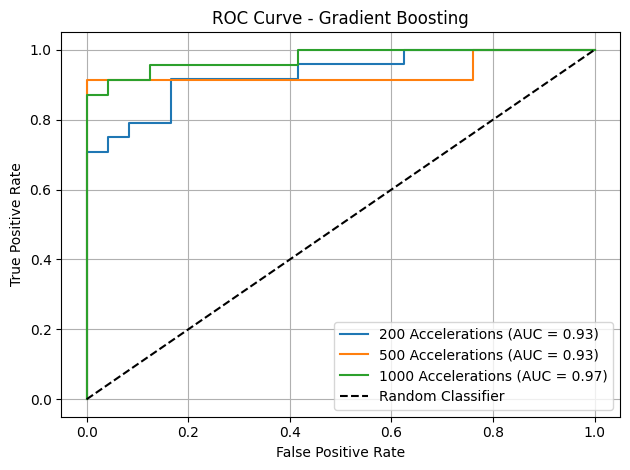

Results for 200 accelerations:
{'Accuracy': 0.8541666666666666, 'Precision': 0.8148148148148148, 'Recall': 0.9166666666666666, 'F1 Score': 0.8627450980392157, 'F2 Score': 0.8943089430894309, 'True Positive Rate': np.float64(0.9166666666666666), 'False Positive Rate': np.float64(0.20833333333333334), 'True Negative Rate': np.float64(0.7916666666666666), 'False Negative Rate': np.float64(0.08333333333333333), 'Confusion Matrix': array([[19,  5],
       [ 2, 22]]), 'ROC AUC': np.float64(0.9305555555555556)}

Results for 500 accelerations:
{'Accuracy': 0.875, 'Precision': 0.84, 'Recall': 0.9130434782608695, 'F1 Score': 0.875, 'F2 Score': 0.8974358974358975, 'True Positive Rate': np.float64(0.9130434782608695), 'False Positive Rate': np.float64(0.16), 'True Negative Rate': np.float64(0.84), 'False Negative Rate': np.float64(0.08695652173913043), 'Confusion Matrix': array([[21,  4],
       [ 2, 21]]), 'ROC AUC': np.float64(0.9339130434782609)}

Results for 1000 accelerations:
{'Accuracy': 0.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, fbeta_score, roc_curve, auc
)

def evaluate_gradient_boosting(file_path, label):
    df = pd.read_excel(file_path)
    X = df.drop(columns=['earthquake?'])
    y = df['earthquake?']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = GradientBoostingClassifier(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "F2 Score": f2,
        "True Positive Rate": tp / (tp + fn) if (tp + fn) > 0 else 0,
        "False Positive Rate": fp / (fp + tn) if (fp + tn) > 0 else 0,
        "True Negative Rate": tn / (tn + fp) if (tn + fp) > 0 else 0,
        "False Negative Rate": fn / (fn + tp) if (fn + tp) > 0 else 0,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "ROC AUC": roc_auc
    }

# Run for each file and collect results
results_200 = evaluate_gradient_boosting("earthquake_200.xlsx", "200 Accelerations")
results_500 = evaluate_gradient_boosting("earthquake_500.xlsx", "500 Accelerations")
results_1000 = evaluate_gradient_boosting("earthquake_1000.xlsx", "1000 Accelerations")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title("ROC Curve - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Print results
print("Results for 200 accelerations:")
print(results_200)
print("\nResults for 500 accelerations:")
print(results_500)
print("\nResults for 1000 accelerations:")
print(results_1000)


In [ ]:
import pandas as pd
for file in ["earthquake_200.xlsx", "earthquake_500.xlsx", "earthquake_1000.xlsx"]:
    df = pd.read_excel(file)
    counts = df['earthquake?'].value_counts()
    print(f"\n{file}:")
    print(f" - No earthquake (0): {counts.get(0, 0)}")
    print(f" - Earthquake (1): {counts.get(1, 0)}")



earthquake_200.xlsx:
 - No earthquake (0): 78
 - Earthquake (1): 80

earthquake_500.xlsx:
 - No earthquake (0): 78
 - Earthquake (1): 79

earthquake_1000.xlsx:
 - No earthquake (0): 78
 - Earthquake (1): 78


[LightGBM] [Info] Number of positive: 56, number of negative: 54
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7492
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509091 -> initscore=0.036368
[LightGBM] [Info] Start training from score 0.036368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

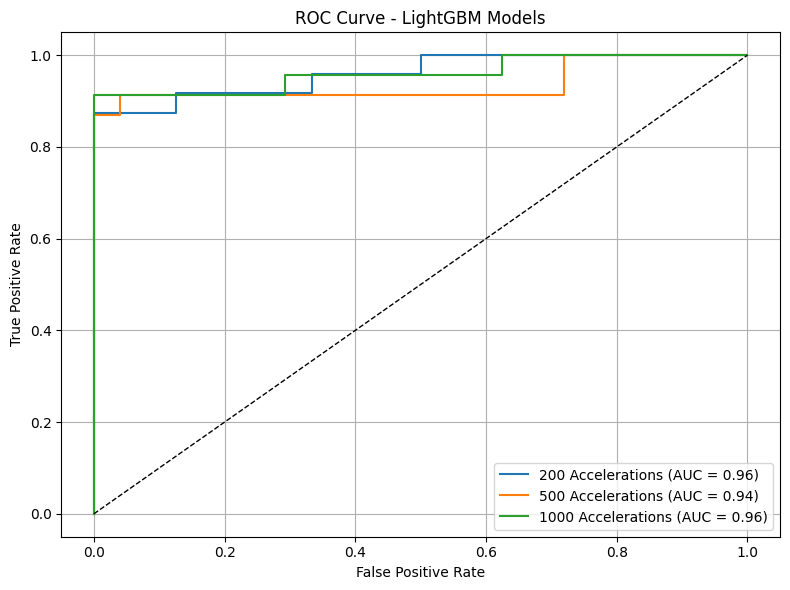


Results for 200 accelerations:
{'Accuracy': 0.8125, 'Precision': 0.7586206896551724, 'Recall': 0.9166666666666666, 'F1 Score': 0.8301886792452831, 'F2 Score': 0.88, 'ROC AUC': np.float64(0.9600694444444444), 'True Positive Rate': np.float64(0.9166666666666666), 'False Positive Rate': np.float64(0.2916666666666667), 'True Negative Rate': np.float64(0.7083333333333334), 'False Negative Rate': np.float64(0.08333333333333333), 'Confusion Matrix': array([[17,  7],
       [ 2, 22]])}

Results for 500 accelerations:
{'Accuracy': 0.9375, 'Precision': 0.9545454545454546, 'Recall': 0.9130434782608695, 'F1 Score': 0.9333333333333333, 'F2 Score': 0.9210526315789473, 'ROC AUC': np.float64(0.9356521739130435), 'True Positive Rate': np.float64(0.9130434782608695), 'False Positive Rate': np.float64(0.04), 'True Negative Rate': np.float64(0.96), 'False Negative Rate': np.float64(0.08695652173913043), 'Confusion Matrix': array([[24,  1],
       [ 2, 21]])}

Results for 1000 accelerations:
{'Accuracy': 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# Store curves for plotting later
roc_data = []

def evaluate_lightgbm(file_path, label):
    df = pd.read_excel(file_path)
    X = df.drop(columns=['earthquake?'])
    y = df['earthquake?']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LGBMClassifier(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    auc = roc_auc_score(y_test, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Save ROC data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data.append((fpr, tpr, auc, label))

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "F2 Score": f2,
        "ROC AUC": auc,
        "True Positive Rate": tp / (tp + fn) if (tp + fn) > 0 else 0,
        "False Positive Rate": fp / (fp + tn) if (fp + tn) > 0 else 0,
        "True Negative Rate": tn / (tn + fp) if (tn + fp) > 0 else 0,
        "False Negative Rate": fn / (fn + tp) if (fn + tp) > 0 else 0,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
    }

# Run evaluations
results_200 = evaluate_lightgbm("earthquake_200.xlsx", label="200 Accelerations")
results_500 = evaluate_lightgbm("earthquake_500.xlsx", label="500 Accelerations")
results_1000 = evaluate_lightgbm("earthquake_1000.xlsx", label="1000 Accelerations")

# Plot all ROC curves together
plt.figure(figsize=(8, 6))
for fpr, tpr, auc, label in roc_data:
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results
print("\nResults for 200 accelerations:")
print(results_200)
print("\nResults for 500 accelerations:")
print(results_500)
print("\nResults for 1000 accelerations:")
print(results_1000)


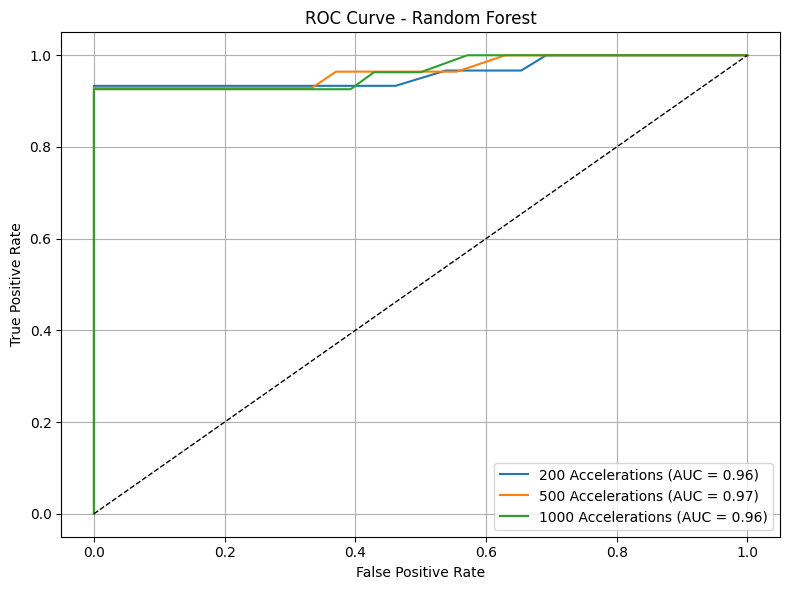


Results for 200 accelerations:
{'Accuracy': 0.9464285714285714, 'Precision': 0.9655172413793104, 'Recall (True Positive Rate)': 0.9333333333333333, 'F1 Score': 0.9491525423728814, 'ROC AUC': np.float64(0.9608974358974359), 'True Positive Rate': np.float64(0.9333333333333333), 'False Positive Rate': np.float64(0.038461538461538464), 'True Negative Rate': np.float64(0.9615384615384616), 'False Negative Rate': np.float64(0.06666666666666667)}

Results for 500 accelerations:
{'Accuracy': 0.9636363636363636, 'Precision': 1.0, 'Recall (True Positive Rate)': 0.9285714285714286, 'F1 Score': 0.9629629629629629, 'ROC AUC': np.float64(0.9662698412698414), 'True Positive Rate': np.float64(0.9285714285714286), 'False Positive Rate': np.float64(0.0), 'True Negative Rate': np.float64(1.0), 'False Negative Rate': np.float64(0.07142857142857142)}

Results for 1000 accelerations:
{'Accuracy': 0.9636363636363636, 'Precision': 1.0, 'Recall (True Positive Rate)': 0.9259259259259259, 'F1 Score': 0.96153846

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

def evaluate_random_forest(file_path, label):
    # Load the dataset
    df = pd.read_excel(file_path)
    X = df.drop(columns=['earthquake?'])
    y = df['earthquake?']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Initialize the Random Forest model and fit it to the data
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predictions and probabilities for ROC curve
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (True Positive Rate)": recall,
        "F1 Score": f1,
        "ROC AUC": auc,
        "True Positive Rate": tp / (tp + fn) if (tp + fn) > 0 else 0,
        "False Positive Rate": fp / (fp + tn) if (fp + tn) > 0 else 0,
        "True Negative Rate": tn / (tn + fp) if (tn + fp) > 0 else 0,
        "False Negative Rate": fn / (fn + tp) if (fn + tp) > 0 else 0,
    }

# Evaluate and collect results
plt.figure(figsize=(8, 6))

results_200 = evaluate_random_forest("earthquake_200.xlsx", label="200 Accelerations")
results_500 = evaluate_random_forest("earthquake_500.xlsx", label="500 Accelerations")
results_1000 = evaluate_random_forest("earthquake_1000.xlsx", label="1000 Accelerations")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print results
print("\nResults for 200 accelerations:")
print(results_200)

print("\nResults for 500 accelerations:")
print(results_500)

print("\nResults for 1000 accelerations:")
print(results_1000)


In [1]:
import pandas as pd

# Input and output file mappings
files = {
    "earthquake_200.xlsx": "earthquake_200.xlsx",
    "earthquake_500.xlsx": "earthquake_500.xlsx",
    "earthquake_1000.xlsx": "earthquake_1000.xlsx"
}

for input_file, output_file in files.items():
    # Load the Excel file with headers
    df = pd.read_excel(input_file)

    # Separate features and label
    feature_columns = df.columns[:-1]         # All columns except the last one
    label_column = df.columns[-1]             # The 'earthquake?' column

    # Take absolute value of only the acceleration features
    df[feature_columns] = df[feature_columns].abs()

    # Save the result to a new Excel file
    df.to_excel(output_file, index=False)
    print(f"Saved: {output_file}")


Saved: earthquake_200.xlsx
Saved: earthquake_500.xlsx
Saved: earthquake_1000.xlsx


In [2]:
#This is to ensure all the results are positive
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def save_random_forest_model(file_path, model_save_path):
    # Load dataset
    df = pd.read_excel(file_path)
    X = df.drop(columns=['earthquake?'])
    y = df['earthquake?']

    # Train/test split
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.35, random_state=42)

    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Save trained model
    joblib.dump(model, model_save_path)

# Save the model trained on 200 acceleration readings
save_random_forest_model("earthquake_200.xlsx", "random_forest_200.pkl")


In [21]:
import pandas as pd
import joblib

# Load the trained Random Forest model
model = joblib.load("random_forest_200.pkl")

# Load the 200-acceleration dataset (used to train this model)
data = pd.read_excel("earthquake_200.xlsx")

# Filter to get only false alarms (earthquake? == 0)
false_alarms = data[data["earthquake?"] == 0]

# Check if there are any false alarms
if false_alarms.empty:
    print("No false alarm samples found in the dataset.")
else:
    # Select the first false alarm sample (drop the 'earthquake?' column)
    sample = false_alarms.iloc[0, :-1].values

    # Convert to DataFrame (model expects 2D input)
    new_data = pd.DataFrame([sample])

    # Make prediction
    prediction = model.predict(new_data)[0]

    print(f"Prediction: {prediction} (0 = False Alarm, 1 = Earthquake)")


Prediction: 0 (0 = False Alarm, 1 = Earthquake)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
